# MMDetection 3.0 설치

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Mon Jul  3 05:13:12 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

- 다른 버전

In [ ]:
# install
!pip3 install openmim
!mim install mmengine
!mim install "mmcv>=2.0.0,<2.1.0"

# gitclone
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection
!pip install -e .

# version
import mmdet
print(mmdet.__version__)
# Example output: 3.0.0, or an another version.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 60.1 MB/s eta 0:00:00
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.3/374.3 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 33.4 MB/s eta 0:00:00
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 MB 22.6 MB/s eta 0:00:00
Cloning into 'mmdetection'...
remote: Enumerating objects: 36698, done.
remote: Counting objects: 100% (162/162), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 36698 (delta 51), reused 142 (delta 44), pack-reused 36536
Receiving objects: 100% (36698/36698), 56.85 MiB | 22.27 MiB/s, done.
Resolving deltas: 100% (25747/25747), done.
/content/mmdetection
Obtaining file:///content/mmdetection
  Prepa

In [ ]:
# Check Pytorch installation
import torch, torchvision
print("torch version:",torch.__version__, "cuda:",torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print("mmdetection:",mmdet.__version__)

# Check mmcv installation
import mmcv
print("mmcv:",mmcv.__version__)

# Check mmengine installation
import mmengine
print("mmengine:",mmengine.__version__)

torch version: 2.0.1+cu118 cuda: True
mmdetection: 3.1.0
mmcv: 2.0.1
mmengine: 0.7.4


In [ ]:
!mim download mmdet --config rtmdet_tiny_8xb32-300e_coco --dest .

processing rtmdet_tiny_8xb32-300e_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 MiB 44.3 MB/s eta 0:00:00
Successfully downloaded rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth to /content/mmdetection
Successfully dumped rtmdet_tiny_8xb32-300e_coco.py to /content/mmdetection


In [ ]:
# case a
%run demo/image_demo.py demo/demo.jpg rtmdet_tiny_8xb32-300e_coco.py --weights rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth --device cpu

Loads checkpoint by local backend from path: rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: data_preprocessor.mean, data_preprocessor.std

07/03 05:14:03 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.
07/03 05:14:03 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


Output()

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming 
release, it will be required to pass the indexing argument. (Triggered internally at 
../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]

results have been saved at outputs


In [ ]:
# case b
from mmdet.apis import init_detector, inference_detector

config_file = 'rtmdet_tiny_8xb32-300e_coco.py'
checkpoint_file = 'rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth'
model = init_detector(config_file, checkpoint_file, device='cpu')  # or device='cuda:0'
inference_detector(model, 'demo/demo.jpg')

Loads checkpoint by local backend from path: rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: data_preprocessor.mean, data_preprocessor.std



<DetDataSample(

    META INFORMATION
    pad_shape: (640, 640)
    img_id: 0
    img_shape: (640, 640)
    ori_shape: (427, 640)
    img_path: 'demo/demo.jpg'
    batch_input_shape: (640, 640)
    scale_factor: (1.0, 1.0)

    DATA FIELDS
    gt_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            bboxes: tensor([], size=(0, 4))
            labels: tensor([], dtype=torch.int64)
        ) at 0x7f26b4183190>
    ignored_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            bboxes: tensor([], size=(0, 4))
            labels: tensor([], dtype=torch.int64)
        ) at 0x7f26b4183070>
    pred_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            bboxes: tensor([[221.3719, 176.1281, 456.2581, 383.2401],
                        [295.3506, 117.1835, 378.5715, 150.2712],
                        [190.5735, 109.7099, 299.5221, 155.

# 데이터 준비

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# permmision warning 방지
!chmod 600 ~/.kaggle/kaggle.json

# download the data
#!kaggle datasets download -d jomainho/snack-data-to50 -p /content/
!kaggle datasets download -d kimsoohwan/multi-snack -p /content/

Saving kaggle.json to kaggle.json
100% 336M/338M [00:08<00:00, 42.4MB/s]
100% 338M/338M [00:08<00:00, 40.1MB/s]


In [ ]:
!unzip -q /content/multi-snack.zip -d /content/multi-snack
#!unzip -q /content/multi-snack.zip -d /content/multi-snack

In [ ]:
import json

file_path = '/content/multi-snack/train/train.json'

with open(file_path, 'r') as file:
    data = json.load(file)

names = []  # List to store the values related to the 'name' key

# Iterate over the 'annotations' section of the data
for category in data['categories']:
    if 'name' in category:
        name = category['name']
        names.append(name)

# Print the extracted names
print(len(names))
print(names)

50
['65621', '50098', '30152', '45219', '30064', '30166', '50117', '50062', '30120', '20211', '10178', '45221', '10092', '30061', '10091', '30119', '25679', '30086', '50063', '15033', '45222', '65629', '65858', '30066', '50061', '20164', '10094', '90078', '30140', '15046', '45227', '30060', '15175', '10093', '65723', '90072', '10210', '30292', '10209', '45220', '35044', '30099', '30096', '65727', '65719', '65890', '90073', '10095', '20167', '30291']


# 데이터 확인

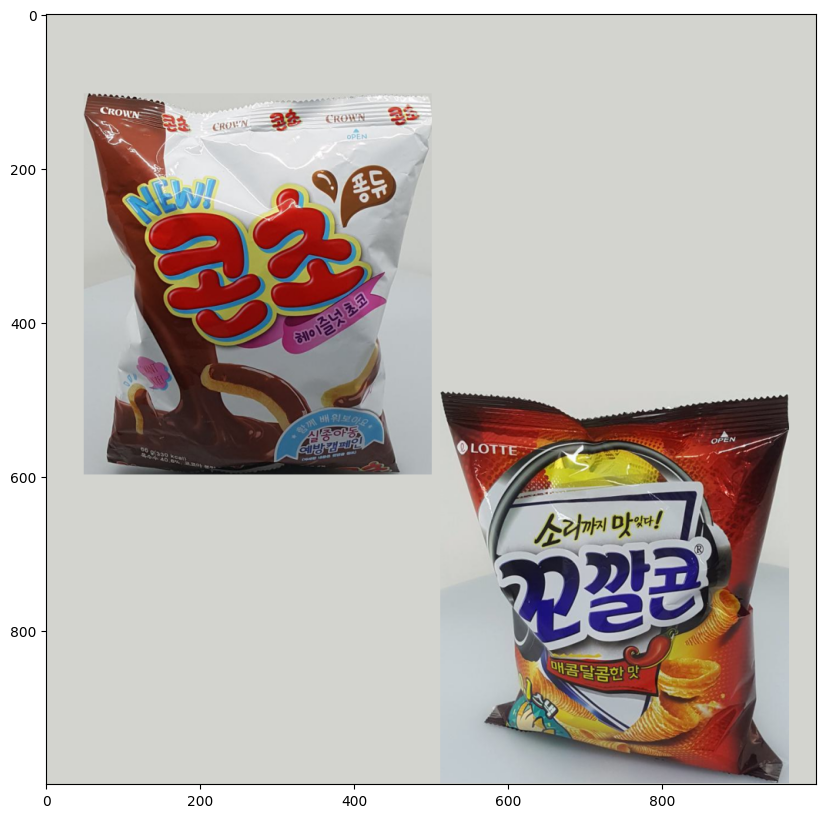

In [ ]:
# Let's take a look at the dataset image
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread('/content/multi-snack/train/images/00_10.png')
plt.figure(figsize=(15, 10))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

# 모델 학습

- Configuration 모델 준비

In [ ]:
from mmengine.config import Config
cfg = Config.fromfile('/content/mmdetection/configs/rtmdet/rtmdet_s_8xb32-300e_coco.py')
print(f'Config:\n{cfg.pretty_text}')

Config:
default_scope = 'mmdet'
default_hooks = dict(
    timer=dict(type='IterTimerHook'),
    logger=dict(type='LoggerHook', interval=50),
    param_scheduler=dict(type='ParamSchedulerHook'),
    checkpoint=dict(type='CheckpointHook', interval=10, max_keep_ckpts=3),
    sampler_seed=dict(type='DistSamplerSeedHook'),
    visualization=dict(type='DetVisualizationHook'))
env_cfg = dict(
    cudnn_benchmark=False,
    mp_cfg=dict(mp_start_method='fork', opencv_num_threads=0),
    dist_cfg=dict(backend='nccl'))
vis_backends = [dict(type='LocalVisBackend')]
visualizer = dict(
    type='DetLocalVisualizer',
    vis_backends=[dict(type='LocalVisBackend')],
    name='visualizer')
log_processor = dict(type='LogProcessor', window_size=50, by_epoch=True)
log_level = 'INFO'
load_from = None
resume = False
train_cfg = dict(
    type='EpochBasedTrainLoop',
    max_epochs=300,
    val_interval=10,
    dynamic_intervals=[(280, 1)])
val_cfg = dict(type='ValLoop')
test_cfg = dict(type='TestLoop')
param

- Pretrained model 다운로드

In [ ]:
# -c url에서 다운받아 -0 경로에 저장한다.
!mkdir checkpoints
!wget -c https://download.openmmlab.com/mmdetection/v3.0/rtmdet/rtmdet_s_8xb32-300e_coco/rtmdet_s_8xb32-300e_coco_20220905_161602-387a891e.pth \
      -O checkpoints/RTMDET_s_training.pth


mkdir: cannot create directory ‘checkpoints’: File exists
--2023-07-03 05:15:31--  https://download.openmmlab.com/mmdetection/v3.0/rtmdet/rtmdet_s_8xb32-300e_coco/rtmdet_s_8xb32-300e_coco_20220905_161602-387a891e.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.246.48.206, 47.246.48.210, 47.246.48.207, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|47.246.48.206|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



- configuration 수정

In [ ]:
from mmengine.runner import set_random_seed

# Modify dataset classes and color
cfg.metainfo = {
  'classes': (['65621', '50098', '30152', '45219', '30064', '30166',
               '50117', '50062', '30120', '20211', '10178', '45221',
               '10092', '30061', '10091', '30119', '25679', '30086',
               '50063', '15033', '45222', '65629', '65858', '30066',
               '50061', '20164', '10094', '90078', '30140', '15046',
               '45227', '30060', '15175', '10093', '65723', '90072',
               '10210', '30292', '10209', '45220', '35044', '30099',
               '30096', '65727', '65719', '65890', '90073', '10095',
               '20167', '30291']),
    'palette': [(220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),
                (220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),
                (220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),
                (220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),
                (220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),
                (220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),
                (220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),
                (220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),
                (220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),
                (220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60)]
}


train_cfg = dict(
    type='EpochBasedTrainLoop',
    max_epochs=40,
    val_interval=10,
    dynamic_intervals=[(280, 1)])

cfg.train_dataloader.batch_size = 8


# Modify dataset type and path
cfg.data_root = '/content/multi-snack'

cfg.train_dataloader.dataset.ann_file = 'train/train.json'
cfg.train_dataloader.dataset.data_root = cfg.data_root
cfg.train_dataloader.dataset.data_prefix.img = 'train/images'
cfg.train_dataloader.dataset.metainfo = cfg.metainfo

cfg.val_dataloader.dataset.ann_file = 'valid/valid.json'
cfg.val_dataloader.dataset.data_root = cfg.data_root
cfg.val_dataloader.dataset.data_prefix.img = 'valid/images'
cfg.val_dataloader.dataset.metainfo = cfg.metainfo

#cfg.test_dataloader = cfg.val_dataloader

#cfg.test_dataloader.dataset.ann_file = 'test.json'
#cfg.test_dataloader.dataset.data_root = cfg.data_root
#cfg.test_dataloader.dataset.data_prefix.img = 'images/'
#cfg.test_dataloader.dataset.metainfo = cfg.metainfo

#cfg.test_dataloader.dataset.pipeline = cfg.val_dataloader.dataset.pipeline

# Modify pipelines

'''
cfg.train_dataloader.dataset.pipeline=[
            dict(type='LoadImageFromFile', backend_args=None),
            dict(type='LoadAnnotations', with_bbox=True),
            dict(
                type='CachedMosaic',
                img_scale=(640, 640),
                pad_val=114.0,
                max_cached_images=20,
                random_pop=False),
            dict(
                type='RandomResize',
                scale=(1280, 1280),
                ratio_range=(0.5, 2.0),
                keep_ratio=True),
            dict(type='RandomCrop', crop_size=(640, 640)),
            dict(type='YOLOXHSVRandomAug'),
            dict(type='RandomFlip', prob=0.5),
            dict(type="RandomGrayscale"),
            dict(
                type='Pad', size=(640, 640),
                pad_val=dict(img=(114, 114, 114))),
            dict(
                type='CachedMixUp',
                img_scale=(640, 640),
                ratio_range=(1.0, 1.0),
                max_cached_images=10,
                random_pop=False,
                pad_val=(114, 114, 114),
                prob=0.5),
            dict(type='PackDetInputs')
        ]
'''

# Modify metric config
cfg.val_evaluator.ann_file = cfg.data_root+'/'+'valid/valid.json'
#cfg.test_evaluator = cfg.val_evaluator
#cfg.test_evaluator.ann_file = cfg.data_root+'/'+'test.json'

# Modify num classes of the model in box head and mask head
cfg.model.bbox_head.num_classes = 50

# cfg.model.roi_head.mask_head.num_classes = 1

# We can still the pre-trained Mask RCNN model to obtain a higher performance
cfg.load_from = 'checkpoints/RTMDET_s_training.pth'


# Set up working dir to save files and logs.
cfg.work_dir = '/content/drive/MyDrive'


# We can set the evaluation interval to reduce the evaluation times
cfg.train_cfg.val_interval = 3
# We can set the checkpoint saving interval to reduce the storage cost
cfg.default_hooks.checkpoint.interval = 3

# The original learning rate (LR) is set for 8-GPU training.
# We divide it by 8 since we only use one GPU.
cfg.optim_wrapper.optimizer.lr = 0.02 / 8
cfg.default_hooks.logger.interval = 10

# Set seed thus the results are more reproducible
# cfg.seed = 0
set_random_seed(0, deterministic=False)

# We can also use tensorboard to log the training process
cfg.visualizer.vis_backends.append({"type":'TensorboardVisBackend'})

print(f'Config:\n{cfg.pretty_text}')

Config:
default_scope = 'mmdet'
default_hooks = dict(
    timer=dict(type='IterTimerHook'),
    logger=dict(type='LoggerHook', interval=10),
    param_scheduler=dict(type='ParamSchedulerHook'),
    checkpoint=dict(type='CheckpointHook', interval=3, max_keep_ckpts=3),
    sampler_seed=dict(type='DistSamplerSeedHook'),
    visualization=dict(type='DetVisualizationHook'))
env_cfg = dict(
    cudnn_benchmark=False,
    mp_cfg=dict(mp_start_method='fork', opencv_num_threads=0),
    dist_cfg=dict(backend='nccl'))
vis_backends = [dict(type='LocalVisBackend')]
visualizer = dict(
    type='DetLocalVisualizer',
    vis_backends=[
        dict(type='LocalVisBackend'),
        dict(type='TensorboardVisBackend')
    ],
    name='visualizer')
log_processor = dict(type='LogProcessor', window_size=50, by_epoch=True)
log_level = 'INFO'
load_from = 'checkpoints/RTMDET_s_training.pth'
resume = False
train_cfg = dict(
    type='EpochBasedTrainLoop',
    max_epochs=300,
    val_interval=3,
    dynamic_inte

In [ ]:
import os

save_path = '/content/test.py'
try :
    os.mkdir(os.path.dirname(save_path))
except FileExistsError:
    print(f"Directory already exists: {os.path.dirname(save_path)}")

cfg.dump(save_path)

Directory already exists: /content


- 데이터 로드 및 학습 시작

In [ ]:
from mmengine.config import Config
from mmengine.runner import Runner
runner = Runner.from_cfg(cfg)

07/03 05:16:00 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Jun  7 2023, 12:45:35) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 209652396
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,

/usr/local/lib/python3.10/dist-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmdet.visualization.local_visualizer.DetLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(


07/03 05:16:07 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
07/03 05:16:07 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(49          ) EMAHook                            
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
after_load_checkpoint:
(49          ) EMAHook                            
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(49          ) EMAHook                            
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
(NORMAL      ) PipelineSwitchHoo

In [ ]:
runner.train()

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
07/03 05:16:11 - mmengine - INFO - paramwise_options -- backbone.stem.0.bn.weight:weight_decay=0.0
07/03 05:16:11 - mmengine - INFO - paramwise_options -- backbone.stem.0.bn.bias:weight_decay=0.0
07/03 05:16:11 - mmengine - INFO - paramwise_options -- backbone.stem.1.bn.weight:weight_decay=0.0
07/03 05:16:11 - mmengine - INFO - paramwise_options -- backbone.stem.1.bn.bias:weight_decay=0.0
07/03 05:16:11 - mmengine - INFO - paramwise_options -- backbone.stem.2.bn.weight:weight_decay=0.0
07/03 05:16:11 - mmengine - INFO - paramwise_options -- backbone.stem.2.bn.bias:weight_decay=0.0
07/03 05:16:11 - mmengine - INFO - paramwise_options -- backbone.stage1.0.bn.weight:weight_decay=0.0
07/03 05:16:11 - mmengine - INFO - paramwise_options -- backbone.stage1.0.bn.bias:weight_decay=0.0
07/03 05:16:11 - mmengine - INFO - paramwise_options -- backbone.stage1.1.main_conv.bn.weight:weight_decay=0.0
07/03 05:16:11 - m

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


07/03 05:16:12 - mmengine - INFO - paramwise_options -- neck.bottom_up_blocks.0.blocks.0.conv1.bn.weight:weight_decay=0.0
07/03 05:16:12 - mmengine - INFO - paramwise_options -- neck.bottom_up_blocks.0.blocks.0.conv1.bn.bias:weight_decay=0.0
07/03 05:16:12 - mmengine - INFO - paramwise_options -- neck.bottom_up_blocks.0.blocks.0.conv2.depthwise_conv.bn.weight:weight_decay=0.0
07/03 05:16:12 - mmengine - INFO - paramwise_options -- neck.bottom_up_blocks.0.blocks.0.conv2.depthwise_conv.bn.bias:weight_decay=0.0
07/03 05:16:12 - mmengine - INFO - paramwise_options -- neck.bottom_up_blocks.0.blocks.0.conv2.pointwise_conv.bn.weight:weight_decay=0.0
07/03 05:16:12 - mmengine - INFO - paramwise_options -- neck.bottom_up_blocks.0.blocks.0.conv2.pointwise_conv.bn.bias:weight_decay=0.0
07/03 05:16:12 - mmengine - INFO - paramwise_options -- neck.bottom_up_blocks.1.main_conv.bn.weight:weight_decay=0.0
07/03 05:16:12 - mmengine - INFO - paramwise_options -- neck.bottom_up_blocks.1.main_conv.bn.bias

Downloading: "https://download.openmmlab.com/mmdetection/v3.0/rtmdet/cspnext_rsb_pretrain/cspnext-s_imagenet_600e.pth" to /root/.cache/torch/hub/checkpoints/cspnext-s_imagenet_600e.pth


Loads checkpoint by local backend from path: checkpoints/RTMDET_s_training.pth
The model and loaded state dict do not match exactly

size mismatch for bbox_head.rtm_cls.0.weight: copying a param with shape torch.Size([80, 128, 1, 1]) from checkpoint, the shape in current model is torch.Size([50, 128, 1, 1]).
size mismatch for bbox_head.rtm_cls.0.bias: copying a param with shape torch.Size([80]) from checkpoint, the shape in current model is torch.Size([50]).
size mismatch for bbox_head.rtm_cls.1.weight: copying a param with shape torch.Size([80, 128, 1, 1]) from checkpoint, the shape in current model is torch.Size([50, 128, 1, 1]).
size mismatch for bbox_head.rtm_cls.1.bias: copying a param with shape torch.Size([80]) from checkpoint, the shape in current model is torch.Size([50]).
size mismatch for bbox_head.rtm_cls.2.weight: copying a param with shape torch.Size([80, 128, 1, 1]) from checkpoint, the shape in current model is torch.Size([50, 128, 1, 1]).
size mismatch for bbox_head.rt

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


07/03 05:16:30 - mmengine - INFO - Epoch(train)   [1][10/64]  lr: 2.2547e-05  eta: 7:10:09  time: 1.3449  data_time: 0.2032  memory: 3773  loss: 2.6034  loss_cls: 1.8569  loss_bbox: 0.7465
07/03 05:16:33 - mmengine - INFO - Epoch(train)   [1][20/64]  lr: 4.7572e-05  eta: 4:34:23  time: 0.8584  data_time: 0.1027  memory: 3789  loss: 2.6060  loss_cls: 1.8630  loss_bbox: 0.7430
07/03 05:16:37 - mmengine - INFO - Epoch(train)   [1][30/64]  lr: 7.2597e-05  eta: 3:43:38  time: 0.7000  data_time: 0.0691  memory: 3808  loss: 2.6090  loss_cls: 1.8694  loss_bbox: 0.7396
07/03 05:16:41 - mmengine - INFO - Epoch(train)   [1][40/64]  lr: 9.7622e-05  eta: 3:17:36  time: 0.6188  data_time: 0.0524  memory: 3765  loss: 2.6201  loss_cls: 1.8892  loss_bbox: 0.7308
07/03 05:16:45 - mmengine - INFO - Epoch(train)   [1][50/64]  lr: 1.2265e-04  eta: 3:01:48  time: 0.5696  data_time: 0.0422  memory: 3784  loss: 2.6258  loss_cls: 1.9025  loss_bbox: 0.7232
07/03 05:16:48 - mmengine - INFO - Epoch(train)   [1][6

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


07/03 05:17:51 - mmengine - INFO - Epoch(val)   [3][ 10/150]    eta: 0:00:45  time: 0.3249  data_time: 0.0653  memory: 3787  
07/03 05:17:53 - mmengine - INFO - Epoch(val)   [3][ 20/150]    eta: 0:00:37  time: 0.2849  data_time: 0.0358  memory: 475  
07/03 05:17:56 - mmengine - INFO - Epoch(val)   [3][ 30/150]    eta: 0:00:32  time: 0.2712  data_time: 0.0262  memory: 475  
07/03 05:17:58 - mmengine - INFO - Epoch(val)   [3][ 40/150]    eta: 0:00:29  time: 0.2655  data_time: 0.0215  memory: 475  
07/03 05:18:01 - mmengine - INFO - Epoch(val)   [3][ 50/150]    eta: 0:00:26  time: 0.2617  data_time: 0.0187  memory: 475  
07/03 05:18:03 - mmengine - INFO - Epoch(val)   [3][ 60/150]    eta: 0:00:23  time: 0.2466  data_time: 0.0071  memory: 475  
07/03 05:18:06 - mmengine - INFO - Epoch(val)   [3][ 70/150]    eta: 0:00:20  time: 0.2462  data_time: 0.0073  memory: 475  
07/03 05:18:08 - mmengine - INFO - Epoch(val)   [3][ 80/150]    eta: 0:00:17  time: 0.2462  data_time: 0.0074  memory: 475  

KeyboardInterrupt: ignored

# 훈련 결과 확인

In [ ]:
import mmcv
from mmdet.apis import init_detector, inference_detector
img = mmcv.imread('/content/snack-data-to50/valid/images/10210_30_m_2.jpg',channel_order='rgb')
checkpoint_file = '/content/drive/MyDrive/epoch_20.pth'
model = init_detector(cfg, checkpoint_file, device='cpu')  # or device='cuda:0'
new_result = inference_detector(model, img)
print(new_result)

Loads checkpoint by local backend from path: /content/drive/MyDrive/epoch_20.pth
<DetDataSample(

    META INFORMATION
    scale_factor: (0.896, 0.896)
    pad_shape: (896, 896)
    img_path: None
    img_shape: (896, 896)
    batch_input_shape: (896, 896)
    ori_shape: (1000, 1000)
    img_id: 0

    DATA FIELDS
    ignored_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            bboxes: tensor([], size=(0, 4))
            labels: tensor([], dtype=torch.int64)
        ) at 0x7fb8716c61a0>
    pred_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            bboxes: tensor([[ 70.0165, 233.7447, 515.3750, 844.1683],
                        [455.3006, 172.8728, 812.2993, 673.3092],
                        [298.6165, 195.1202, 677.2340, 734.7372],
                        [ 71.8527, 235.5352, 515.3503, 853.0230],
                        [ 69.8320, 229.3503, 509.3522, 851.5264],
            

In [ ]:
from mmdet.registry import VISUALIZERS
# init visualizer(run the block only once in jupyter notebook)
visualizer = VISUALIZERS.build(model.cfg.visualizer)
# the dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
visualizer.dataset_meta = model.dataset_meta

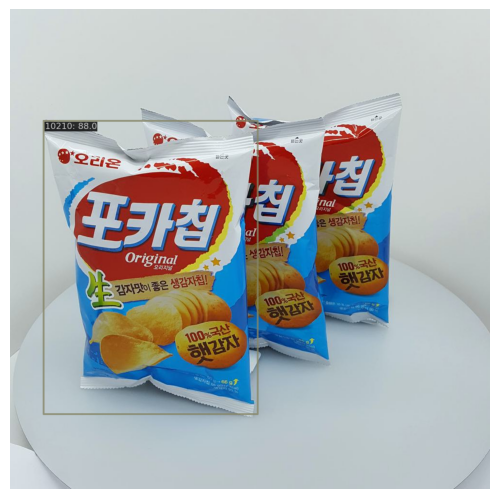

In [ ]:
# show the results
visualizer.add_datasample(
    'result',
    img,
    data_sample=new_result,
    draw_gt = None,
    wait_time=0,
    pred_score_thr=0.8
)
visualizer.show()

In [ ]:
from mmengine.visualization import Visualizer

# get built visualizer
visualizer_now = Visualizer.get_current_instance()
#visualizer_now = Visualizer.get_instance()
# the dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
visualizer_now.dataset_meta = model.dataset_meta
# show the results
visualizer_now.add_datasample(
    'new_result',
    img,
    data_sample=new_result,
    draw_gt= False,
    wait_time=0,
    out_file=None,
    step = 10,
    pred_score_thr=0.5
)
visualizer_now.show()